#Aula 4: Estatísticas no ENEM 2018

##Introdução 

A partir desta aula iremos analisar e discutir um _sample_ da base de dados do ENEM 2018, ou seja iremos explorar e conhecer uma pequena amostra da base de dados do ENEM 2018. Nessa aula vamos falar sobre diversos temas importantes na área de IA e esse será o primeiro passo para construir os modelos de machine learning da próxima aula. 

In [51]:
import pandas as pd
%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format
dados = pd.read_csv("https://github.com/guilhermesilveira/enem-2018/blob/master/MICRODADOS_ENEM_2018_SAMPLE_43278.csv?raw=true")
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,...,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,Q026,Q027
0,180009327796,2018,2112209,Timon,21,MA,34.00,M,1.00,1,1,"2,207,702.00",Parnaíba,22.00,PI,1,5,1,3.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,1,0,0,0,0,0,0,0,0,...,NaN,1,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,B,B,B,B,4,C,A,B,C,A,B,B,A,B,A,B,A,A,B,A,A,C,A,B,B,A,A
1,180012890374,2018,3557105,Votuporanga,35,SP,14.00,M,0.00,1,1,"3,557,105.00",Votuporanga,35.00,SP,4,0,1,nan,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ADDEDEEBCAADDEDEBECCBAECECEDBAADEABAECDADECDC,0,BCACEEBBBDACEDECAADDDABDBCCACDCBCEDEDABEBEAEA,CDECAABBDDECBEEDBEBBEBEDEEEBCEAEECECCDBDDCACD,CBEDBBBDCBECADBBBECBEAECABDADACDBABCECBBEDADAB...,ADAEDABBCAADBEXEBBDEEADCCCCDACEDDABCBCAAEBBDD,1.00,160.00,120.00,120.00,160.00,120.00,680.00,F,F,A,D,4,N,A,D,D,C,A,B,A,B,A,B,A,A,C,A,B,E,B,D,B,D,D
2,180008223824,2018,2506301,Guarabira,25,PB,20.00,F,0.00,2,1,"2,506,301.00",Guarabira,25.00,PB,1,3,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,ABCBEECAABDDADCACAAAABDDEDACAEEECCDCEBBABBECB,1,BDDEDBCACEBCCACDCDDAECAADBDBCEEAEAABEBEBBACED,CACDDBDDECCEDEEEBCEAEECBBEBEDBEDECBEBDCAABCDE,BBDECBBCDBCECBABDBEDACDDBBBEADECACEDBEBABCBEAE...,ACEADCEBBDADAAEBBDDEDABADBEXCCCDBCAEEACBCDDAB,1.00,120.00,120.00,120.00,120.00,120.00,600.00,E,E,B,B,5,B,A,B,D,A,A,B,A,A,A,B,A,A,B,A,A,D,A,B,B,A,E
3,180007859645,2018,3534807,Ouro Verde,35,SP,17.00,F,0.00,2,1,"3,514,403.00",Dracena,35.00,SP,2,0,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,DEBEBEABDABECACDDDECBBDDBCBBCABDAACCECBABDCDA,0,ACEDEAEAEBECAADABBDBCEDEDDCDDABCCACBCACEBDEBB,ECCBBEBEDBEDBDDAEECDECBECACDEDEECDECAABBDEBCE,BCDEBDBCBBACDCBEAECBABADBBECECBDBBEABDADACEDEC...,EBBDEECCCDACEADCBCAAEBBCBCADAEDABADDADDABDBEX,1.00,100.00,120.00,100.00,80.00,0.00,400.00,B,D,C,C,7,F,A,B,D,B,A,B,B,B,A,A,A,A,B,A,A,E,A,A,A,B,A
4,180013499517,2018,3523107,Itaquaquecetuba,35,SP,19.00,M,0.00,3,1,"3,550,308.00",São Paulo,35.00,SP,1,2,1,1.00,0,nan,nan,NaN,nan,NaN,nan,nan,nan,0,0,0,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,F,F,B,D,5,E,A,B,C,B,A,B,A,B,A,A,A,A,B,A,A,D,B,B,B,A,A


##Explorando e Análisando a Base do Enem 2018

Primeiro vamos conhecer todas as colunas do nosso dataframe:


In [52]:
print(dados.columns.values)

['NU_INSCRICAO' 'NU_ANO' 'CO_MUNICIPIO_RESIDENCIA'
 'NO_MUNICIPIO_RESIDENCIA' 'CO_UF_RESIDENCIA' 'SG_UF_RESIDENCIA'
 'NU_IDADE' 'TP_SEXO' 'TP_ESTADO_CIVIL' 'TP_COR_RACA' 'TP_NACIONALIDADE'
 'CO_MUNICIPIO_NASCIMENTO' 'NO_MUNICIPIO_NASCIMENTO' 'CO_UF_NASCIMENTO'
 'SG_UF_NASCIMENTO' 'TP_ST_CONCLUSAO' 'TP_ANO_CONCLUIU' 'TP_ESCOLA'
 'TP_ENSINO' 'IN_TREINEIRO' 'CO_ESCOLA' 'CO_MUNICIPIO_ESC'
 'NO_MUNICIPIO_ESC' 'CO_UF_ESC' 'SG_UF_ESC' 'TP_DEPENDENCIA_ADM_ESC'
 'TP_LOCALIZACAO_ESC' 'TP_SIT_FUNC_ESC' 'IN_BAIXA_VISAO' 'IN_CEGUEIRA'
 'IN_SURDEZ' 'IN_DEFICIENCIA_AUDITIVA' 'IN_SURDO_CEGUEIRA'
 'IN_DEFICIENCIA_FISICA' 'IN_DEFICIENCIA_MENTAL' 'IN_DEFICIT_ATENCAO'
 'IN_DISLEXIA' 'IN_DISCALCULIA' 'IN_AUTISMO' 'IN_VISAO_MONOCULAR'
 'IN_OUTRA_DEF' 'IN_GESTANTE' 'IN_LACTANTE' 'IN_IDOSO'
 'IN_ESTUDA_CLASSE_HOSPITALAR' 'IN_SEM_RECURSO' 'IN_BRAILLE'
 'IN_AMPLIADA_24' 'IN_AMPLIADA_18' 'IN_LEDOR' 'IN_ACESSO' 'IN_TRANSCRICAO'
 'IN_LIBRAS' 'IN_LEITURA_LABIAL' 'IN_MESA_CADEIRA_RODAS'
 'IN_MESA_CADEIRA_SEPARADA' '

Se você analisar algumas das últimas colunas, vemos que lá temos alguns dados relevantes: notas das provas e redação. 

Como nosso tempo aqui é restrito, vamos analisar apenas as notas entre si, mas reflita: Será que existe uma correlação entre as notas? Quem tira notas maiores em redação também vai bem em linguagens?

In [53]:
#Criando um dataframe que tenhas apenas as colunas das notas
colunas_de_notas = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
#Removendo as linhas que tenham valores nun
dados_notas = dados[colunas_de_notas].dropna()
#Alterando o nome das colunas
dados_notas.columns = ['ciencias_naturais', 'ciencias_humanas', 'linguagem_codigo', 'matematica', 'redacao']
dados_notas.head()

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
1,523.10,671.30,661.60,738.00,680.00
2,409.20,531.70,389.00,438.10,600.00
3,452.30,505.50,448.50,544.90,400.00
6,428.50,505.20,521.00,436.80,560.00
8,491.80,575.70,524.40,487.60,660.00


In [54]:
print(len(dados_notas))
#Nesse novo dataframe temos uma base de 97.270 linhas e 5 colunas
print ("{}".format(len(dados) - len(dados_notas)))
# 40.574 a menos que original

97270
40574


Agora sim, vamos calcular a correlação:

In [55]:
correlacao = dados_notas.corr()
correlacao

,ciencias_naturais,ciencias_humanas,linguagem_codigo,matematica,redacao
ciencias_naturais,1.00,0.57,0.60,0.58,0.51
ciencias_humanas,0.57,1.00,0.70,0.53,0.50
linguagem_codigo,0.60,0.70,1.00,0.57,0.56
matematica,0.58,0.53,0.57,1.00,0.48
redacao,0.51,0.50,0.56,0.48,1.00


Temos vários resultados interessantes por aqui: 
* O primeiro é uma correlação considerável entre _linguagem_codigo_ e _ciencias_humanas_, o que parece fazer sentido. 
* Uma correlação que surpreende é entre _linguagem_codigo_ e _redacao_. Embora haja uma correlação maior em relação às outras matérias e redação, eu esperava um valor ainda maior do que o existente. 
* A última é a pouca relação entre _ciencias_naturais_ e _matematica_ apesar de serem ciências exatas.


Repare que as correlações com _linguagem_codigos_ sempre são as maiores e isso me faz pensar em várias hipóteses:
* Será que se eu estudar mais português vou ter um desempenho melhor nas outras matérias? (lembre-se que o ENEM é uma prova que demanda interpretação de texto, então essa prerrogativa pode fazer sentido). 
* Será que se eu considerar provas de anos anteriores e comparar as correlações com _linguagem_códigos_ elas serão maiores?

Conclusão: A verdade é que uma simples análise de correlação nos gera diversas hipóteses. Se tiver curiosidade e quiser fazer essas análises fica como um desafio extra!

##Plotando o Gráfico de Correlação

Plotemos um gráfico para visualizar a correlação de uma melhor forma. Abaixo seguem o código usado:

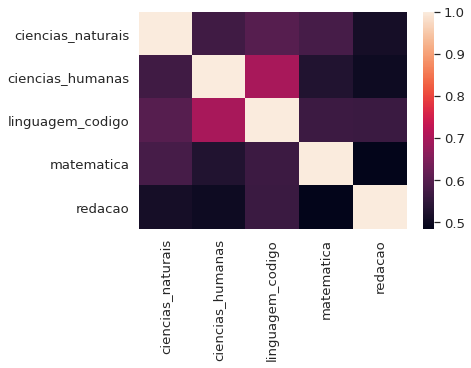

In [56]:
import seaborn as sns
sns.heatmap(correlacao)

Nós analisamos e conhecemos a base de dados, mas no final o que vou querer é construir um modelo de Machine Learning para fazer as predições de algumas notas. Para criar esse modelo de ML devemos analisar a distribuição dos nossos dados e verificar se existe alguma tendência entre eles, facilitando o processo preditivo.

Então, vamos ao pairplot:

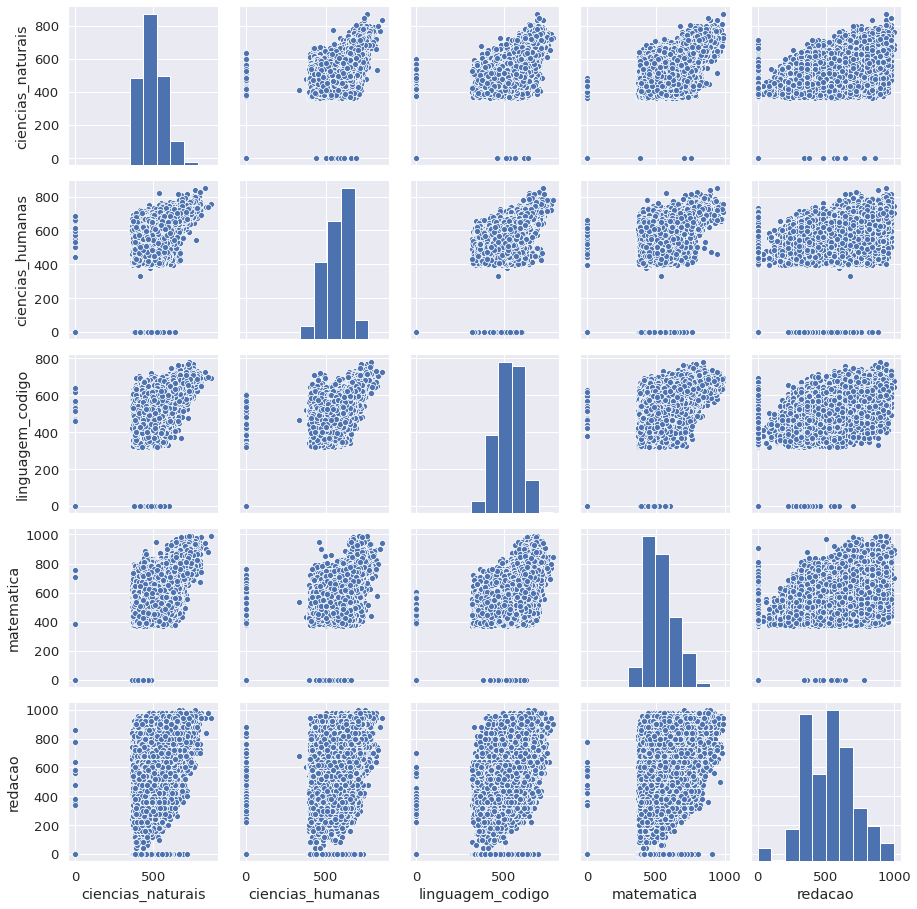

In [57]:
sns.pairplot(dados_notas)

Embora existam alguns dados com maior dispersão, outros parecem obedecer uma certa tendência. Dessa forma, desenvolver um modelo de ML com resultados razoáveis será complexo, porém possível (para detalhes das análises, acompanhe a discussão na videoaula).

#Desafios

A partir de agora você irá colocar a mão na massa, nossos desafios serão mais analítcos. Queremos que você vivencie o dia-a-dia de um ciêntista de dados, discutindo suas conclusões no Slack e estudando as análises de outros colegas, por isso não haverá gabarito.

## Desafio 1
Se a pessoa não teve presença, preencha a nota dela com algum número. A nota 0? A nota média? A mediana?

In [58]:
# Dados do dicionário do ENEM
# faltou = 0 e eliminado = 2
dados_nota = dados.copy()

dados_nota.loc[dados['TP_PRESENCA_CN'].isin([0, 2]), 'NU_NOTA_CN'] = 0 
#dados[dados['TP_PRESENCA_CN'] == presente]['NU_NOTA_CN'].mean()
dados_nota.loc[dados['TP_PRESENCA_CH'].isin([0, 2]), 'NU_NOTA_CH'] = 0
dados_nota.loc[dados['TP_PRESENCA_LC'].isin([0, 2]), 'NU_NOTA_LC'] = 0
dados_nota.loc[dados['TP_PRESENCA_MT'].isin([0, 2]), 'NU_NOTA_MT'] = 0

dados_nota[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT
0,0.00,0.00,0.00,0.00
1,523.10,671.30,661.60,738.00
2,409.20,531.70,389.00,438.10
3,452.30,505.50,448.50,544.90
4,0.00,0.00,0.00,0.00


##Desafio 2

A matriz de correlação está feiosa, vamos deixar mais bonita? :) Não se esqueça de manter os valores dentro delas.

In [0]:
sns.set(font_scale = 1.2)
labels = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']
plt.figure(figsize = (6, 6))
ax = sns.heatmap(
    correlacao,
    annot=True,
    cmap="YlGnBu",
    cbar=False,
    xticklabels=labels,
    yticklabels=labels,
    # mask=np.triu(np.ones_like(corr, dtype=np.bool))
)
plt.show()

# Reseta as configurações para o padrão
sns.set()

##Desafio 3
Pairplot dos acertos de cada categoria (CN, CH, MT, LC, nota pura da redação). Usar o gabarito e as respostas.

In [0]:
#Função para calcular o numero de acerto
def conta_acertos(aluno, materia):
    respostas = aluno.get('TX_RESPOSTAS_{}' .format(materia))
    gabarito = aluno.get('TX_GABARITO_{}' .format(materia))
    if (type(respostas) != str or type(gabarito) != str):
        return 0
    return sum(a==b for a, b in zip(respostas, gabarito))

In [0]:
#Aplicando a função em cada categoria
dados_nota_2 = dados_nota.copy()
dados_nota_2['NU_RESPOSTAS_CORRETAS_CN'] = dados_nota_2.apply(conta_acertos, materia='CN', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_CH'] = dados_nota_2.apply(conta_acertos, materia='CH', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_LC'] = dados_nota_2.apply(conta_acertos, materia='LC', axis=1)
dados_nota_2['NU_RESPOSTAS_CORRETAS_MT'] = dados_nota_2.apply(conta_acertos, materia='MT', axis=1)

In [0]:
#Plotando o gráfico dos dados obtidos
num_questoes_acertadas = dados_nota_2[['NU_RESPOSTAS_CORRETAS_CN', 
                                       'NU_RESPOSTAS_CORRETAS_CH', 
                                       'NU_RESPOSTAS_CORRETAS_LC', 
                                       'NU_RESPOSTAS_CORRETAS_MT', 
                                       'NU_NOTA_REDACAO']]
num_questoes_acertadas.columns = ['Ciências da Natureza', 'Ciências Humanas', 'Linguagens e Códigos', 'Matemática', 'Redação']

sns.set()
sns.pairplot(num_questoes_acertadas)

##Desafio 4
Remover todos os zeros. Tomar o cuidado que no desafio 1 já tomamos decisões ligadas a limpeza dos dados também. Você também pode exportar para outro CSV se quiser.

In [0]:
# Seguindo a dica da Thais
import numpy as np

dados_nota_sem_0 = dados_nota_2.copy()

dados_nota_sem_0['NU_NOTA_CN'] = dados_nota_2['NU_NOTA_CN'].replace(0., np.NAN)
dados_nota_sem_0['NU_NOTA_CH'] = dados_nota_2['NU_NOTA_CH'].replace(0., np.NAN)
dados_nota_sem_0['NU_NOTA_LC'] = dados_nota_2['NU_NOTA_LC'].replace(0., np.NAN)
dados_nota_sem_0['NU_NOTA_MT'] = dados_nota_2['NU_NOTA_MT'].replace(0., np.NAN)

dados_nota_sem_0.dropna(subset=['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], inplace=True)

dados_nota_sem_0[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].head()

##Desafio 5 
Quais questões tiveram mais erros (análise sobre o gabarito x acertos x erros)

In [0]:
def conta_acertos(aluno, materia):
    respostas = aluno.get('TX_RESPOSTAS_{}' .format(materia))
    gabarito = aluno.get('TX_GABARITO_{}' .format(materia))
    return pd.Series([int(a == b) for a, b in zip(respostas, gabarito)])

In [0]:
# Analisando a prova azul de Ciências da Natureza
prova_cn_azul = dados.query('CO_PROVA_CN == 447')
matriz_acertos = prova_cn_azul.apply(corrige_questoes, materia='CN', axis=1)

In [0]:
total_acertos_por_questao = pd.DataFrame(matriz_acertos.sum())
total_acertos_por_questao.reset_index(inplace=True)
total_acertos_por_questao.columns = ['Questão', 'Número de Acertos']
total_acertos_por_questao['Questão'] = total_acertos_por_questao['Questão'] + 1

plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Questão', y='Número de Acertos', data=total_acertos_por_questao)

ax.set_title('Número de acertos por questão da prova azul de Ciências da Natureza', fontsize=16)

plt.show()

## Desafio 6
Estudar o que as pessoas que estudam o assunto estão discutindo e conclusões que já chegaram sobre a utilização de informações (principalmente sensíveis) para machine learning e data science. Podcast do datahackers também sobre o assunto.

